In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
import pydotplus

In [2]:
heart_data=pd.read_csv("C:/Users/91738/Desktop/framingham.csv")

In [3]:
heart_data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

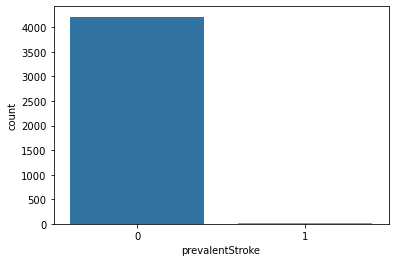

In [4]:
sns.countplot(x="prevalentStroke",data=heart_data)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

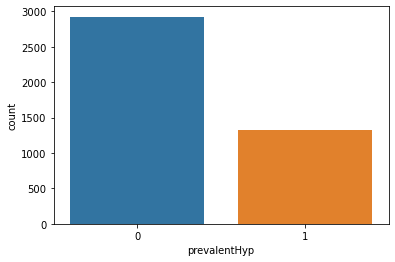

In [5]:
sns.countplot(x="prevalentHyp",data=heart_data)

<AxesSubplot:ylabel='Frequency'>

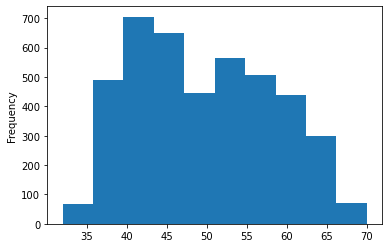

In [6]:
heart_data["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

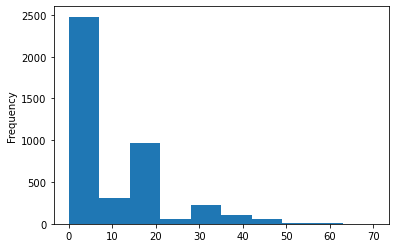

In [7]:
heart_data["cigsPerDay"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

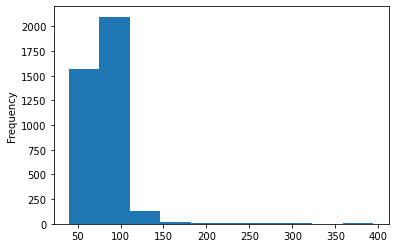

In [8]:
heart_data["glucose"].plot.hist()

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

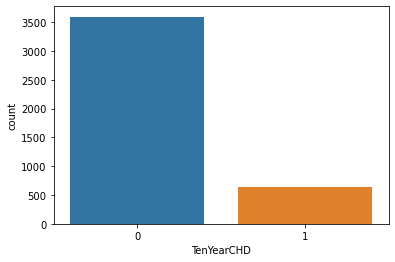

In [9]:
sns.countplot(x="TenYearCHD",data=heart_data)

In [10]:
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

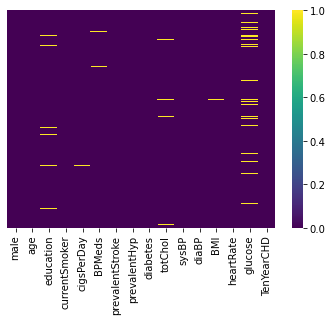

In [11]:
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap="viridis")

In [12]:
heart_data.drop("education",axis=1,inplace=True)

In [13]:
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
m=np.mean(heart_data["glucose"])
print(m)

81.96365524402907


In [15]:
heart_data["glucose"].replace(to_replace=np.nan,value=m,inplace=True)
heart_data["BMI"].replace(to_replace=np.nan,value=25,inplace=True)
heart_data["cigsPerDay"].replace(to_replace=np.nan,value=5,inplace=True)
heart_data["heartRate"].replace(to_replace=np.nan,value=90,inplace=True)
heart_data.drop("currentSmoker",axis=1,inplace=True)

<AxesSubplot:ylabel='Frequency'>

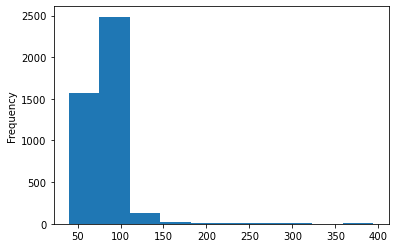

In [16]:
heart_data["glucose"].plot.hist()

In [17]:
heart_data.head(10)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<AxesSubplot:>

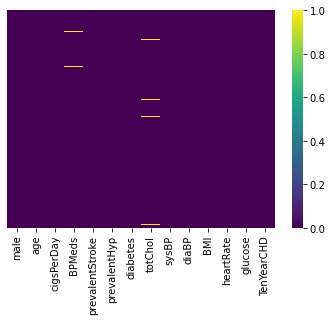

In [18]:
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap="viridis")

In [19]:
heart_data["totChol"].replace(to_replace=np.nan,value=247.0,inplace=True)
heart_data.drop("BPMeds",axis=1,inplace=True)

<AxesSubplot:>

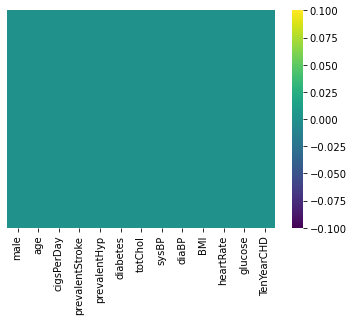

In [20]:
sns.heatmap(heart_data.isnull(),yticklabels=False,cmap="viridis")

In [21]:
heart_data.isnull().sum()

male               0
age                0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

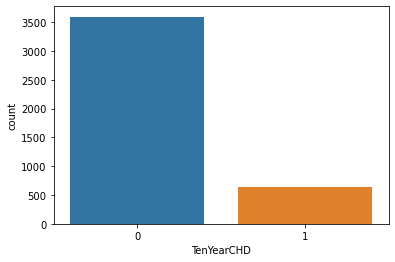

In [22]:
sns.countplot(x="TenYearCHD",data=heart_data)

In [23]:
X=heart_data.drop("TenYearCHD",axis=1)
y=heart_data["TenYearCHD"].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
#Logistic Regression Algorithm

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression().fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

C:\Users\91738\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print('Accuracy Score : '+str(accuracy_score(y_test,y_pred)))
print('Precision Score : '+str(precision_score(y_test,y_pred)))
print('Recall Score : '+str(recall_score(y_test,y_pred)))
print('F1 Score : '+str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix :\n '+str(confusion_matrix(y_test,y_pred)))


Accuracy Score : 0.8655660377358491
Precision Score : 0.7272727272727273
Recall Score : 0.06722689075630252
F1 Score : 0.12307692307692307
Confusion Matrix :
 [[726   3]
 [111   8]]


In [26]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

<AxesSubplot:>

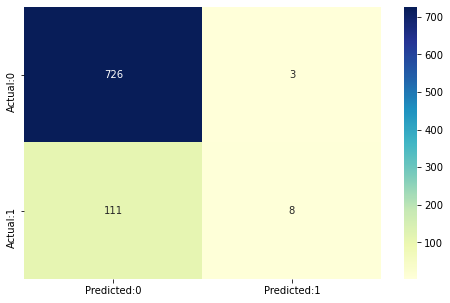

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu")

In [28]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [29]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8655660377358491 
 The Missclassification = 1-Accuracy =  0.13443396226415094 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.06722689075630252 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9958847736625515 
 Positive Predictive value = TP/(TP+FP) =  0.7272727272727273 
 Negative predictive Value = TN/(TN+FN) =  0.8673835125448028 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  16.336134453781586 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9366275435794152


In [30]:
#K Nearest Neighbors Algorithm

from sklearn.neighbors import KNeighborsClassifier

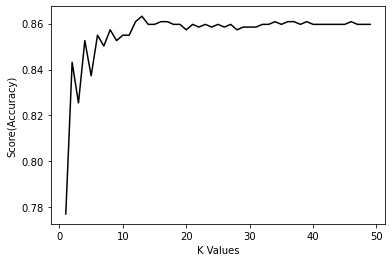

In [31]:
scores = []
for each in range(1,50):
    KNNfind = KNeighborsClassifier(n_neighbors = each)
    KNNfind.fit(X_train,y_train)
    scores.append(KNNfind.score(X_test,y_test))
    
plt.plot(range(1,50),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [32]:
KNNfind = KNeighborsClassifier(n_neighbors = 24) #n_neighbors = K value
KNNfind.fit(X_train,y_train) #learning model
prediction = KNNfind.predict(X_test)
ytrue = y_test

In [33]:
from sklearn.metrics import confusion_matrix
print('Accuracy score using KNN :\n '+str(accuracy_score(ytrue,prediction)))
print('Precision Score : '+str(precision_score(ytrue,prediction)))
print('Recall Score : '+str(recall_score(ytrue,prediction)))
print('F1 Score : '+str(f1_score(ytrue,prediction)))
print('Confusion Matrix :\n '+str(confusion_matrix(ytrue,prediction)))


Accuracy score using KNN :
 0.8584905660377359
Precision Score : 0.42857142857142855
Recall Score : 0.025210084033613446
F1 Score : 0.047619047619047616
Confusion Matrix :
 [[725   4]
 [116   3]]


In [34]:
fn=list(X_train.columns)
cn=heart_data["TenYearCHD"].unique()
cnames=[]
for x in cn:
    x=str(x)
    cnames.append(x)
    
print('feature names are:',fn)
print('class labels are:',cnames)

feature names are: ['male', 'age', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
class labels are: ['0', '1']


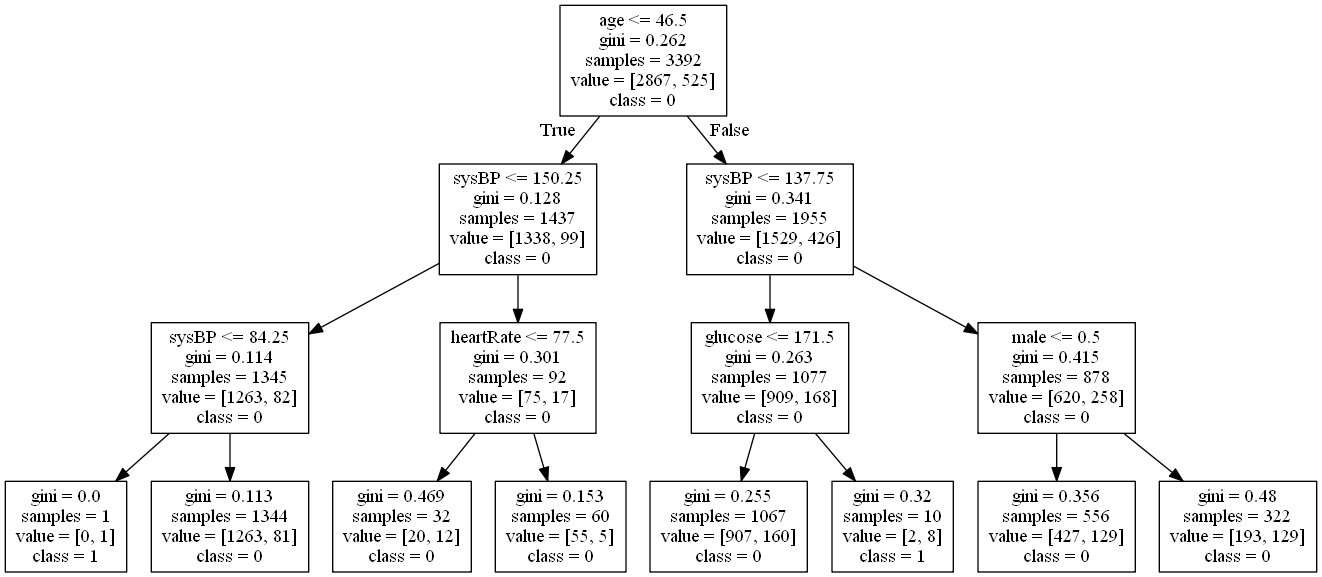

In [35]:
#Decision tree ALgorithm

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=3)
model=DTC.fit(X_train,y_train) #learning
#prediciton
dot_data=tree.export_graphviz(model,out_file=None,feature_names=fn,class_names=cnames)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [36]:
#Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=5)
model=DTC.fit(X_train,y_train) #learning
#prediciton
dot_data=tree.export_graphviz(model,out_file=None,feature_names=fn,class_names=cnames)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [37]:
print("Decision Tree Score: ",DTC.score(X_test,y_test))
DTCscore = DTC.score(X_test,y_test)
print('Precision Score : '+str(precision_score(y_test,y_pred)))
print('Recall Score : '+str(recall_score(y_test,y_pred)))
print('F1 Score : '+str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix :\n '+str(confusion_matrix(ytrue,prediction)))



Decision Tree Score:  0.7747641509433962
Precision Score : 0.7272727272727273
Recall Score : 0.06722689075630252
F1 Score : 0.12307692307692307
Confusion Matrix :
 [[725   4]
 [116   3]]


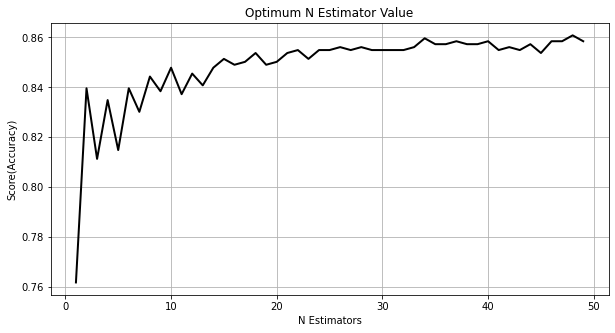

In [38]:
#Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
#Find Optimum K value
scores = []
for each in range(1,50):
    RFfind = RandomForestClassifier(n_estimators = each,random_state=15)
    RFfind.fit(X_train,y_train)
    scores.append(RFfind.score(X_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,50),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()


In [39]:
RFfind= RandomForestClassifier(n_estimators = 24, random_state=15) #n_estimator = DT
RFfind.fit(X_train,y_train) # learning
print("Random Forest Score: ",RFfind.score(X_test,y_test))
RFCscore=RFfind.score(X_test,y_test)

Random Forest Score:  0.8549528301886793


In [40]:
yprediciton2= RFfind.predict(X_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
print('Accuracy score using KNN :\n '+str(accuracy_score(ytrue,yprediciton2)))
print('Precision Score : '+str(precision_score(ytrue,yprediciton2)))
print('Recall Score : '+str(recall_score(ytrue,yprediciton2)))
print('F1 Score : '+str(f1_score(ytrue,yprediciton2)))
print('Confusion Matrix :\n '+str(confusion_matrix(ytrue,yprediciton2)))



Accuracy score using KNN :
 0.8549528301886793
Precision Score : 0.4166666666666667
Recall Score : 0.08403361344537816
F1 Score : 0.1398601398601399
Confusion Matrix :
 [[715  14]
 [109  10]]


In [43]:
print('Confusion Matrix :\n '+str(confusion_matrix(ytrue,yprediciton2)))


Confusion Matrix :
 [[715  14]
 [109  10]]


In [46]:
## Pickle
from xgboost import XGBClassifier
import pickle

# save model
pickle.dump(clf, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open('model.pkl', 'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of K – Nearest Neighbor model: 
 [[726   3]
 [111   8]] 

Accuracy of K – Nearest Neighbor  model =  0.8655660377358491
